In [1]:
import warnings;warnings.filterwarnings('ignore')

import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
path = Path('C:/Users/sappusamy/Documents/SriWK/mnist/train.csv')

In [3]:
dataset = pd.read_csv(path)

In [4]:
y = dataset.label.to_numpy()

In [5]:
x = dataset.iloc[:,1:].to_numpy()

In [6]:
print(x.shape);print(y.shape)

(42000, 784)
(42000,)


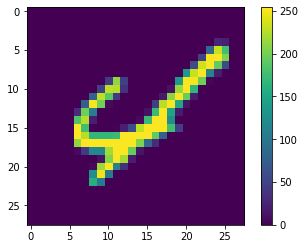

4


In [7]:
index_num = 143

plt.figure()
plt.imshow(x[index_num].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()
print(y[index_num])

## Representation:

*Torch differs from Andrew Ng's representation*<br>
   \begin{equation*}Andrew: Z = WX + b\end{equation*}
   <br>
   \begin{equation*}Torch: Z = X^TW^T + b\end{equation*}
   <br>
   which is obtained by matrix property:
   \begin{equation*}(AB)^T = B^TA^T\end{equation*}
   
   **Note:**<br>
       In Andrew Ng's representation, training examples are **vertically stacked**<br>
       In torch representation, training examples are **horizontally stacked**
       
**Hence torch equation becomes,**
    \begin{equation*} Z = XW^T + b\end{equation*}
  

In [8]:
def linear(x,w,b):
    return torch.matmul(x,w.transpose(0,1)) + b

In [9]:
def sigmoid(z):
    return 1/(1+torch.exp(-z))

In [10]:
def softmax(z):
    return torch.exp(z)/torch.exp(z).sum(1).view(len(z),-1)

In [11]:
def cross_entropy_loss(yhat,y):
    yhat = softmax(yhat)
    return -yhat[range(len(y)),y].log().mean()

In [12]:
def cross_entropy_derivative(yhat,y):
    p = softmax(yhat)
    q = torch.zeros(yhat.shape)
    q[range(len(y)),y]=1
    return (p-q)/y.shape[0]

In [13]:
def sigmoid_derivative(a):
    return a*(1-a)

In [14]:
def weight_derivative(dz,a):
    return torch.matmul(dz.transpose(0,1),a)

In [15]:
def bias_derivative(dz):
    return dz.sum(0)

In [16]:
def a_derivative(dz,W):
    return torch.matmul(dz,W)

In [17]:
def z_derivative(da,act_derv):
    return da*act_derv

## TRAIN

In [18]:
input_units = 784
hidden_units = 50
output_units = 10


W1 = torch.FloatTensor(hidden_units,input_units).uniform_(-1/np.sqrt(input_units),1/np.sqrt(input_units))
b1 = torch.FloatTensor(hidden_units).uniform_(-1/np.sqrt(input_units),1/np.sqrt(input_units))
W2 = torch.FloatTensor(output_units,hidden_units).uniform_(-1/np.sqrt(hidden_units),1/np.sqrt(hidden_units))
b2 = torch.FloatTensor(output_units).uniform_(-1/np.sqrt(hidden_units),1/np.sqrt(hidden_units))

In [19]:
lr=0.1

## 2 - layer NN

In [20]:
X = torch.FloatTensor(x)

In [21]:
for epoch in range(1):
    total_loss=0.0
    itr=0
    for i in range(0,len(X),256):
        xb = X[i:i+256]
        yb = y[i:i+256]
        
        z1 = linear(xb,W1,b1)
        a1 = sigmoid(z1)
        z2 = linear(a1,W2,b2)

        loss = cross_entropy_loss(z2,yb)
        
        dz2 = cross_entropy_derivative(z2,yb)
        dw2 = weight_derivative(dz2,a1)
        db2 = bias_derivative(dz2)
        da1 = a_derivative(dz2,W2)

        dz1 = z_derivative(da1,sigmoid_derivative(a1))
        dw1 = weight_derivative(dz1,xb)
        db1 = bias_derivative(dz1)

        W1 -= lr*dw1
        W2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2
        total_loss+=loss
        itr+=1
    print("epoch 1:",total_loss/itr)

epoch 1: tensor(0.9576)


## TEST

In [22]:
test = pd.read_csv('C:/Users/sappusamy/Documents/SriWK/mnist/test.csv')

In [23]:
x_test = test.to_numpy()

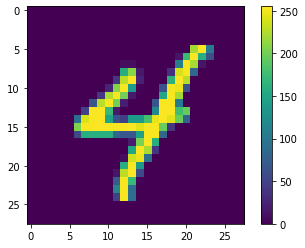

In [24]:
index_num = 1234

plt.figure()
plt.imshow(x_test[index_num].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
inp = torch.FloatTensor(x_test[index_num]).view(1,-1)
z1 = linear(inp,W1,b1)
a1 = sigmoid(z1)
z2 = linear(a1,W2,b2)

softmax(z2).argmax()

tensor(4)

## 3 - layer NN

In [26]:
input_units = 784
hidden_units_1 = 200
hidden_units_2 = 50
output_units = 10


W1 = torch.FloatTensor(hidden_units_1,input_units).uniform_(-1/np.sqrt(input_units),1/np.sqrt(input_units))
b1 = torch.FloatTensor(hidden_units_1).uniform_(-1/np.sqrt(input_units),1/np.sqrt(input_units))

W2 = torch.FloatTensor(hidden_units_2,hidden_units_1).uniform_(-1/np.sqrt(hidden_units_1),1/np.sqrt(hidden_units_1))
b2 = torch.FloatTensor(hidden_units_2).uniform_(-1/np.sqrt(hidden_units_1),1/np.sqrt(hidden_units_1))

W3 = torch.FloatTensor(output_units,hidden_units_2).uniform_(-1/np.sqrt(hidden_units_2),1/np.sqrt(hidden_units_2))
b3 = torch.FloatTensor(output_units).uniform_(-1/np.sqrt(hidden_units),1/np.sqrt(hidden_units_2))

In [27]:
lr = 0.1

In [28]:
for epoch in range(1):
    total_loss=0.0
    itr=0
    for i in range(0,len(X),256):
        xb = X[i:i+256]
        yb = y[i:i+256]
        
        z1 = linear(xb,W1,b1)
        a1 = sigmoid(z1)
        z2 = linear(a1,W2,b2)
        a2 = sigmoid(z2)
        z3 = linear(a2,W3,b3)

        loss = cross_entropy_loss(z3,yb)
        
        dz3 = cross_entropy_derivative(z3,yb)
        dw3 = weight_derivative(dz3,a2)
        db3 = bias_derivative(dz3)
        da2 = a_derivative(dz3,W3)

        dz2 = z_derivative(da2,sigmoid_derivative(a2))
        dw2 = weight_derivative(dz2,a1)
        db2 = bias_derivative(dz2)
        da1 = a_derivative(dz2,W2)
        
        dz1 = z_derivative(da1,sigmoid_derivative(a1))
        dw1 = weight_derivative(dz1,xb)
        db1 = bias_derivative(dz1)
        
        W1 -= lr*dw1
        W2 -= lr*dw2
        W3 -= lr*dw3
        b1 -= lr*db1
        b2 -= lr*db2
        b3 -= lr*db3
        total_loss+=loss
        itr+=1
    print("epoch 1:",total_loss/itr)

epoch 1: tensor(1.6357)


## TEST

In [29]:
test = pd.read_csv('C:/Users/sappusamy/Documents/SriWK/mnist/test.csv')

In [30]:
x_test = test.to_numpy()

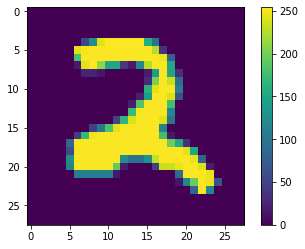

In [31]:
index_num = 908
plt.figure()
plt.imshow(x_test[index_num].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
inp = torch.FloatTensor(x_test[index_num]).view(1,-1)
z1 = linear(inp,W1,b1)
a1 = sigmoid(z1)
z2 = linear(a1,W2,b2)
a2 = sigmoid(z2)
z3 = linear(a2,W3,b3)

softmax(z3).argmax()

tensor(2)